<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Clustering Lab
_Author: Jeff Hale_

In this lab you will practice clustering countries with K-means and DBSCAN. Remember, clustering is a unsupervised learning method so known classes aren't something you'll generally have. 

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from category_encoders import OneHotEncoder as CE_ohe
from sklearn.preprocessing import StandardScaler

#### Read in the gapminder data

In [2]:
gapminder = px.data.gapminder() 

#### Inspect

In [3]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


#### Set the country column as the index

In [5]:
gapminder.set_index('country', inplace = True)

In [6]:
gapminder

,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
country,,,,,,,
Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...
Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


#### Filter the data so that you only have the rows from the most recent year

In [7]:
gap_filtered = gapminder[gapminder['year'] >= 2007]
gap_filtered

,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
country,,,,,,,
Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...
Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887


#### Set your X

In [8]:
X = gap_filtered

#### Drop the columns that make sense to drop for clustering

In [9]:
X = X.drop(columns = 'iso_alpha')

#### One-Hot Encode the columns that make sense to encode
This is far easier with category_encoders package's OneHotEncoder than the scikit-learn version.

In [10]:
ohe = CE_ohe(use_cat_names = True)

In [11]:
X_encoded = ohe.fit_transform(X)

C:\Users\Lindsey\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [12]:
X_encoded

,continent_Asia,continent_Europe,continent_Africa,continent_Americas,continent_Oceania,year,lifeExp,pop,gdpPercap,iso_num
country,,,,,,,,,,
Afghanistan,1,0,0,0,0,2007,43.828,31889923,974.580338,4
Albania,0,1,0,0,0,2007,76.423,3600523,5937.029526,8
Algeria,0,0,1,0,0,2007,72.301,33333216,6223.367465,12
Angola,0,0,1,0,0,2007,42.731,12420476,4797.231267,24
Argentina,0,0,0,1,0,2007,75.320,40301927,12779.379640,32
...,...,...,...,...,...,...,...,...,...,...
Vietnam,1,0,0,0,0,2007,74.249,85262356,2441.576404,704
West Bank and Gaza,1,0,0,0,0,2007,73.422,4018332,3025.349798,275
"Yemen, Rep.",1,0,0,0,0,2007,62.698,22211743,2280.769906,887


#### Scale your features

In [13]:
ss = StandardScaler()

In [14]:
X_scaled = ss.fit_transform(X_encoded)

#### Cluster with KMeans

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans()
kmeans

KMeans()

In [17]:
kmeans.fit(X_scaled)

KMeans()

#### How many country clusters do you have?

I kept the clusters at the defaul of 8.

#### Check out the labels

In [18]:
labels = kmeans.labels_
labels

array([5, 2, 6, 6, 3, 4, 2, 0, 5, 2, 6, 3, 2, 6, 3, 2, 1, 6, 5, 6, 3, 6,
       6, 3, 7, 3, 6, 6, 6, 3, 6, 2, 3, 2, 2, 6, 3, 3, 1, 3, 6, 6, 6, 2,
       2, 6, 6, 2, 6, 2, 3, 6, 1, 3, 3, 0, 2, 2, 7, 5, 5, 5, 2, 0, 2, 3,
       0, 5, 6, 5, 0, 0, 5, 6, 6, 1, 1, 6, 5, 1, 1, 1, 3, 5, 2, 1, 1, 5,
       1, 5, 2, 4, 3, 1, 1, 2, 0, 5, 3, 3, 3, 5, 2, 2, 3, 1, 2, 1, 1, 0,
       1, 2, 1, 0, 2, 2, 1, 1, 2, 5, 1, 1, 2, 2, 5, 0, 1, 5, 1, 3, 1, 2,
       1, 2, 3, 3, 3, 5, 5, 5, 1, 1])

#### Make a copy of the DataFrame and add your labels to it

In [19]:
gap_filtered

,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
country,,,,,,,
Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...
Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887


In [20]:
gap_kmeans = gap_filtered.copy()

In [21]:
gap_kmeans['labels'] = labels
gap_kmeans

,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,labels
country,,,,,,,,
Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4,5
Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8,2
Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12,6
Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24,6
Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32,3
...,...,...,...,...,...,...,...,...
Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704,5
West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275,5
"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887,5


#### Explore your clusters with groupbys and pairplots/scatterplots

In [22]:
gap_kmeans.groupby(by = 'labels').mean()

,year,lifeExp,pop,gdpPercap,iso_num
labels,,,,,
0,2007.0,78.419100,2.516672e+07,31718.798297,403.800000
1,2007.0,56.303857,2.048814e+07,3152.500874,653.642857
2,2007.0,77.648600,1.953662e+07,25054.481636,427.633333
3,2007.0,73.608120,3.595485e+07,11003.031625,393.720000
4,2007.0,80.719500,1.227497e+07,29810.188275,295.000000
5,2007.0,67.247143,5.386701e+07,4143.360880,419.238095
6,2007.0,53.058583,1.482799e+07,3014.986291,231.541667
7,2007.0,68.829500,1.214540e+09,3705.662630,256.000000


In [23]:
gap_kmeans

,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,labels
country,,,,,,,,
Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4,5
Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8,2
Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12,6
Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24,6
Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32,3
...,...,...,...,...,...,...,...,...
Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704,5
West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275,5
"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887,5


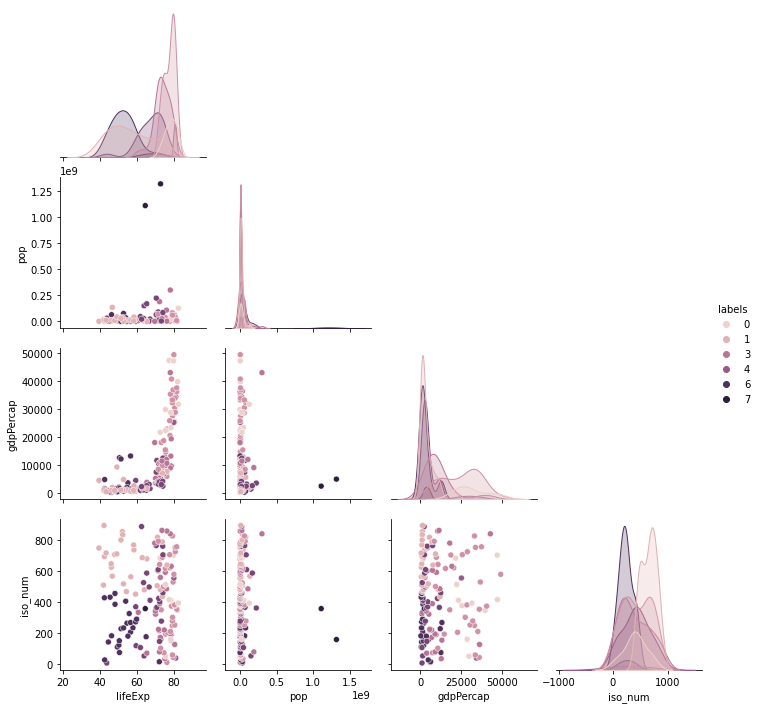

In [24]:
sns.pairplot(data = gap_kmeans.drop(columns = 'year'), hue = 'labels', corner = True);

In [25]:
gap_kmeans.groupby(by = 'labels')['continent'].agg(pd.Series.mode)

labels
0        Asia
1      Africa
2      Europe
3    Americas
4     Oceania
5        Asia
6      Africa
7        Asia
Name: continent, dtype: object

#### Evaluate on silhoutte score

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
silhouette_score(X_scaled, labels)

0.44893342734795405

#### Try other values for K

In [28]:
kmeans2 = KMeans(n_clusters = 6)
kmeans

KMeans()

In [29]:
kmeans2.fit(X_scaled)

KMeans(n_clusters=6)

In [30]:
labels2 = kmeans2.labels_
labels2

array([4, 2, 0, 0, 1, 5, 2, 4, 4, 2, 0, 1, 2, 0, 1, 2, 0, 0, 4, 0, 1, 0,
       0, 1, 3, 1, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 4, 2, 2, 3, 4, 4, 4, 2, 4, 2, 1,
       4, 4, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 4, 2, 0, 0, 4,
       0, 4, 2, 5, 1, 0, 0, 2, 4, 4, 1, 1, 1, 4, 2, 2, 1, 0, 2, 0, 0, 4,
       0, 2, 0, 4, 2, 2, 0, 0, 2, 4, 0, 0, 2, 2, 4, 4, 0, 4, 0, 1, 0, 2,
       0, 2, 1, 1, 1, 4, 4, 4, 0, 0])

In [31]:
silhouette_score(X_scaled, labels2)

0.5468489764810979

#### Make an elbow plot of the silhoutte score

In [32]:
silhouette = []

for k in range(2, 15):
    kmeans_test = KMeans(n_clusters = k)
    kmeans_test.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans_test.labels_))
    
silhouette

[0.3023962327083007,
 0.3936290401091726,
 0.49433544954009223,
 0.5228539998051154,
 0.5468489764810979,
 0.4624419934243689,
 0.44663437720808813,
 0.42463585896355305,
 0.4377792292530721,
 0.41606657586710966,
 0.4071881086090882,
 0.4158282979793822,
 0.4149381112889855]

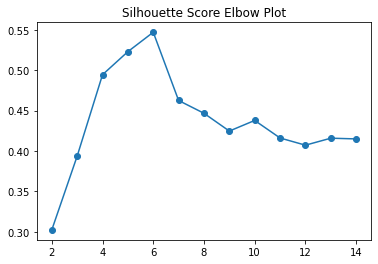

In [33]:
plt.plot(range(2, 15), silhouette, marker = 'o')
plt.title('Silhouette Score Elbow Plot');

####  What's the best number of clusters?

6 clusters gives the best/highest silhouette score.

---
## Part 2 DBSCAN

#### Use DBSCAN to cluster

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
dbscan = DBSCAN(n_jobs = -1)
dbscan.fit(X_scaled)

DBSCAN(n_jobs=-1)

#### Explore and visualize your clustering results

In [36]:
labels = dbscan.labels_

In [37]:
gap_dbscan = gap_filtered.copy()
gap_dbscan['labels'] = labels
gap_dbscan

,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,labels
country,,,,,,,,
Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4,-1
Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8,-1
Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12,-1
Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24,-1
Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32,-1
...,...,...,...,...,...,...,...,...
Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704,-1
West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275,-1
"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887,-1


In [38]:
gap_dbscan.drop(columns = 'year').groupby(by = 'labels').mean()

,lifeExp,pop,gdpPercap,iso_num
labels,,,,
-1,70.804229,5.561360e+07,14849.730613,442.047619
0,54.155833,1.067468e+07,1430.516840,223.166667
1,73.563889,1.251447e+07,6697.999607,250.222222
2,45.428429,9.744367e+06,1324.367442,704.857143
3,45.396600,1.129975e+07,1022.324885,440.400000
4,55.920750,1.153735e+07,1879.522251,498.500000


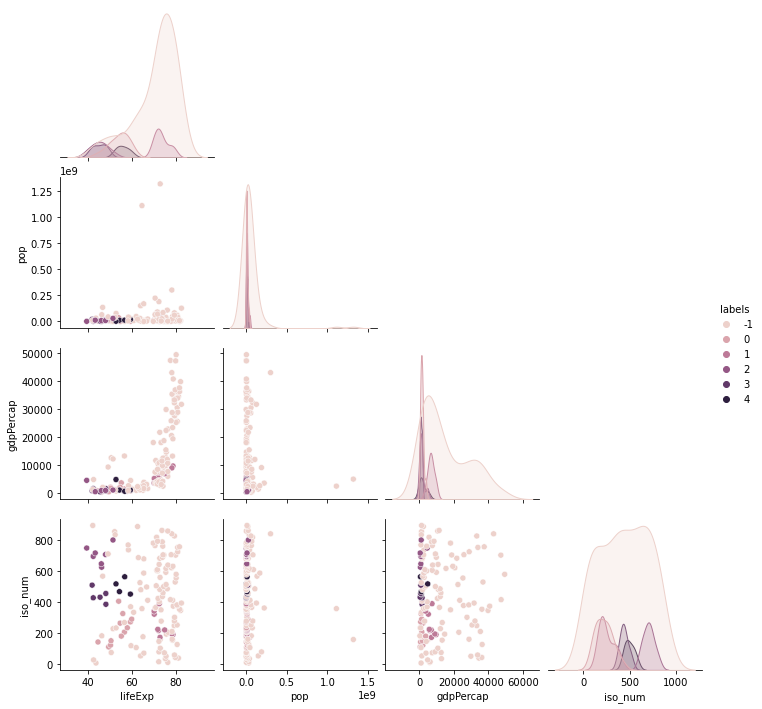

In [39]:
sns.pairplot(data = gap_dbscan.drop(columns = 'year'), hue = 'labels', corner = True);

In [40]:
silhouette_score(X_scaled, labels)

-0.022832882907094388

#### Hyperparameter tune 

In [41]:
def find_best_silhouette(df): 
    """select best eps and min_samples for a DBSCAN
    
    Args:
        df (pandas DataFrame): data to cluster

    Returns:
        None
    """
    best_score = -1
    best_eps = 0
    best_min_samples = 0
    best_clusters = 0
    
    for eps_test in np.linspace(.2, 5, 50):
        for min_samples_test in range(2, round(len(df)/2)):
            dbscan = DBSCAN(eps = eps_test, min_samples = min_samples_test, n_jobs = -1)
            dbscan.fit(X_scaled)
            if len(set(dbscan.labels_)) > 1:
                score = silhouette_score(X_scaled, dbscan.labels_)
                if -1 in set(dbscan.labels_):
                    nclusters = len(set(dbscan.labels_)) -1
                else:
                    nclusters = len(set(dbscan.labels_))

                if score > best_score:
                    best_score = score
                    best_eps = eps_test
                    best_min_samples = min_samples_test
                    best_clusters = nclusters
                
    print(f'Best Silhouette Score:{round(best_score, 2)}')
    print(f'Best Epsilon: {round(best_eps,2)}')
    print(f'Best Min Samples: {best_min_samples}')
    print(f'Best Clusters: {best_clusters}')
    return

In [42]:
find_best_silhouette(gap_filtered)

Best Silhouette Score:0.6
Best Epsilon: 3.43
Best Min Samples: 2
Best Clusters: 3


#### What are your best hyperparameters?

* Best Epsilon: 3.43
* Best Min Samples: 2

---

### Analysis
#### Which algorithm with which hyperparamters would you use to cluster a new country. Why?

I would use DBSCAN with eps at 3.43 and min samples at 2 because it gave me the highest silhouette score.

## Bonus 🎉

Try a clustering algorithm we didn't cover in class. Scikit-learn has a guide to its clustering algorithms [here](https://scikit-learn.org/stable/modules/clustering.html).